# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**STELLA, NJUKI**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Libraries for data preparation and model building 

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [128]:
df = pd.read_csv("df_train.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [129]:
spain_df=df.copy()

In [130]:
# look at data statistics
spain_df.head(10)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


This data contains 49 columns 

In [131]:
spain_df.shape

(8763, 49)

The column Unnamed: 0 is used for indexing. It will not be a useful feature. We therefore drop it. 

In [132]:
del spain_df['Unnamed: 0']

Asses the data types of the columns in the dataframe. Given that we are building a regression model, we need numerical features. 

In [133]:
spain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

Out of the 48 columns in the dataframe, three columns are of data type 'object' while 48 are numerical(float64).The non-numerical columns include:
time,
Valencia_wind_deg,
and Seville_pressure.

In feature engineering, we will have to find a way to convert these columns to numerical features. 

In [134]:
spain_df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

Valencia_pressure contains 2068 null values. This can be expressed as a percentage. As a rule of thumb, when the data goes missing on 60–70 percent of the variable, dropping the variable should be considered. However if it is less than 25% we can replace the missing values with the mean.

In [135]:
#calculate percentage of missing values. 
pct_msng = spain_df.Valencia_pressure.isnull().sum()* 100 / len(df)
print (pct_msng)

23.599224010042224


Since the percentage of missing values is less than 25%, we replace the missing values in the Valencia_pressure column with the mean.

In [136]:
#calculate mean of Valencia_pressure column, round to 6 decimal places for uniformity
round(spain_df['Valencia_pressure'].mean(),6)

1012.051407

In [137]:
#Replace the missing values in 'Valencia_pressure' with the mean:
spain_df['full_Valencia_pressure'] = spain_df['Valencia_pressure'].fillna(1012.051407)

In [138]:
#Get rid of original 'Valencia_pressure' column which contains missing values
del spain_df['Valencia_pressure']

In [139]:
#confirm there are no null values
spain_df.isnull().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity         0
Valencia_temp_min   

A visual(line plot) of our target varible with time can be analysed by first converting the time column(object) to a datetime data type. 

In [140]:
#convert the time column to datetime.
spain_df['datetime'] = pd.to_datetime(spain_df['time'], format='%Y-%m-%d %H:%M:%S')

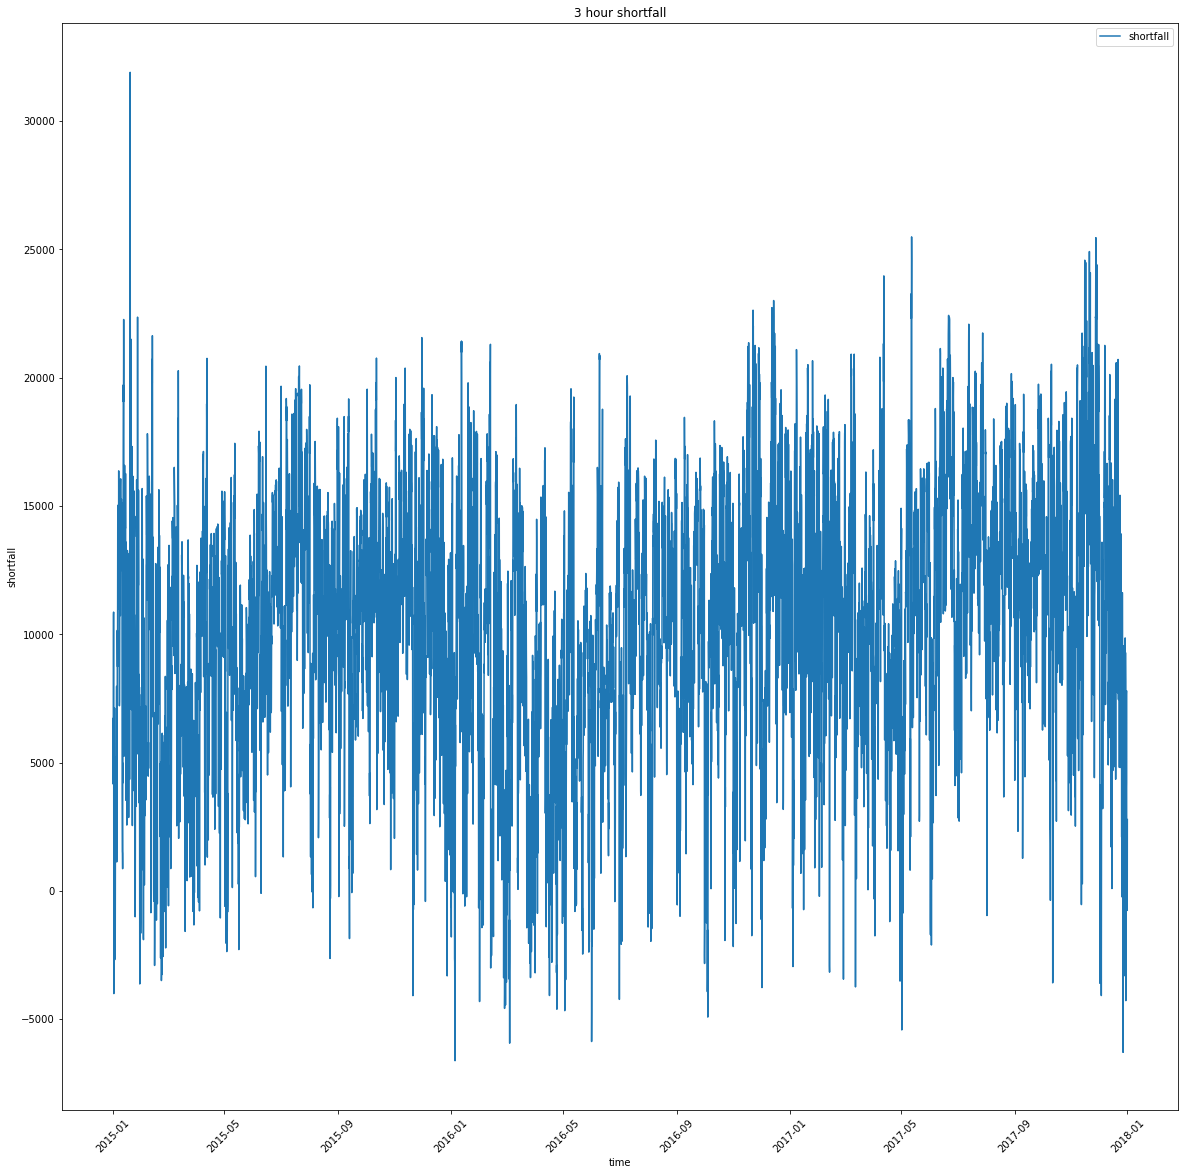

In [141]:
#plot a linegraph
fig,ax = plt.subplots(figsize = (20, 20))
dates = spain_df['datetime']
shortfall = spain_df['load_shortfall_3h']

ax.plot(dates, shortfall, label = 'shortfall')
ax.set_title('3 hour shortfall')
ax.set_xlabel('time')
ax.set_ylabel('shortfall')
ax.legend()
plt.xticks(rotation=45)
plt.show()

There are both positive and negative shortfall values. The shortfall is the difference between the energy generated by means of fossil fuels and various renewable sources. As such, the positive shortfall values indicate that there is a deficit in the amount of energy produced by renewable sources compared to the energy supplied by fossil fuels. The negative shortfall values on the other hand indicate that the amount of energy generated by renewable resources surpasses that of fossil fules.

In [142]:
spain_df.kurtosis()

Madrid_wind_speed            2.036462
Bilbao_rain_1h              32.904656
Valencia_wind_speed         35.645426
Seville_humidity            -1.017983
Madrid_humidity             -1.167537
Bilbao_clouds_all           -1.533417
Bilbao_wind_speed            3.631565
Seville_clouds_all           2.155921
Bilbao_wind_deg             -1.083530
Barcelona_wind_speed         1.493635
Barcelona_wind_deg          -0.959160
Madrid_clouds_all            0.142079
Seville_wind_speed           1.398580
Barcelona_rain_1h          101.578931
Seville_rain_1h             93.840746
Bilbao_snow_3h             806.128471
Barcelona_pressure        3687.564230
Seville_rain_3h            413.136592
Madrid_rain_1h              76.584491
Barcelona_rain_3h          187.800460
Valencia_snow_3h          4089.323165
Madrid_weather_id            9.259047
Barcelona_weather_id         5.701882
Bilbao_pressure              1.825323
Seville_weather_id          10.710308
Seville_temp_max            -0.515989
Madrid_press

In the case of a regression model, outliers change the model's equation which leads to errors in estimation.

A kurtosis of >3 is high which indicates a large number of outliers whereas a low kurtosis <3 indicates a lack of outliers. Evidently some weather conditions in various cities have a large number of outliers.

These include: Bilbao_rain_1h, Valencia_wind_speed, Bilbao_wind_speed, Barcelona_rain_1h,
Seville_rain_1h,
Bilbao_snow_3h,
Barcelona_pressure,
Seville_rain_3h,
Madrid_rain_1h,
Barcelona_rain_3h,
Valencia_snow_3h,
Madrid_weather_id, 
Barcelona_weather_id, and Seville_weather_id.
When buiding our model, we will take note of these features. 

In [143]:
spain_df.skew()

Madrid_wind_speed          1.441144
Bilbao_rain_1h             5.222802
Valencia_wind_speed        3.499637
Seville_humidity          -0.310175
Madrid_humidity           -0.057378
Bilbao_clouds_all         -0.053085
Bilbao_wind_speed          1.716914
Seville_clouds_all         1.814452
Bilbao_wind_deg            0.226927
Barcelona_wind_speed       1.057331
Barcelona_wind_deg        -0.180001
Madrid_clouds_all          1.246745
Seville_wind_speed         1.151006
Barcelona_rain_1h          8.726988
Seville_rain_1h            8.067341
Bilbao_snow_3h            26.177568
Barcelona_pressure        57.979664
Seville_rain_3h           19.342574
Madrid_rain_1h             7.074308
Barcelona_rain_3h         12.696605
Valencia_snow_3h          63.298084
Madrid_weather_id         -3.107722
Barcelona_weather_id      -2.584011
Bilbao_pressure           -0.999642
Seville_weather_id        -3.275574
Seville_temp_max          -0.033931
Madrid_pressure           -1.850768
Valencia_temp_max          0

In highly skewed data, the tail region may act as an outlier. Since outliers adversely affect a model's performance, we need to avoid using these columns as features. 
A skew magnitude less than negative one (<-1) indicates high negative skew, while a skew magnitude greater than one (>1) indicates high positive skew. Therefore columns whose data which fall on either side of these two boundaries should be noted. 

In [144]:
spain_df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,full_Valencia_pressure
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981,-0.142737
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510,-0.199341
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791,-0.038234
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290,-0.078962
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536,-0.146866
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293,-0.067832
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602,0.049049
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804,-0.195540
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800,-0.111615
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633,-0.068613


Text(0.5, 1.0, 'Correlation Heatmap')

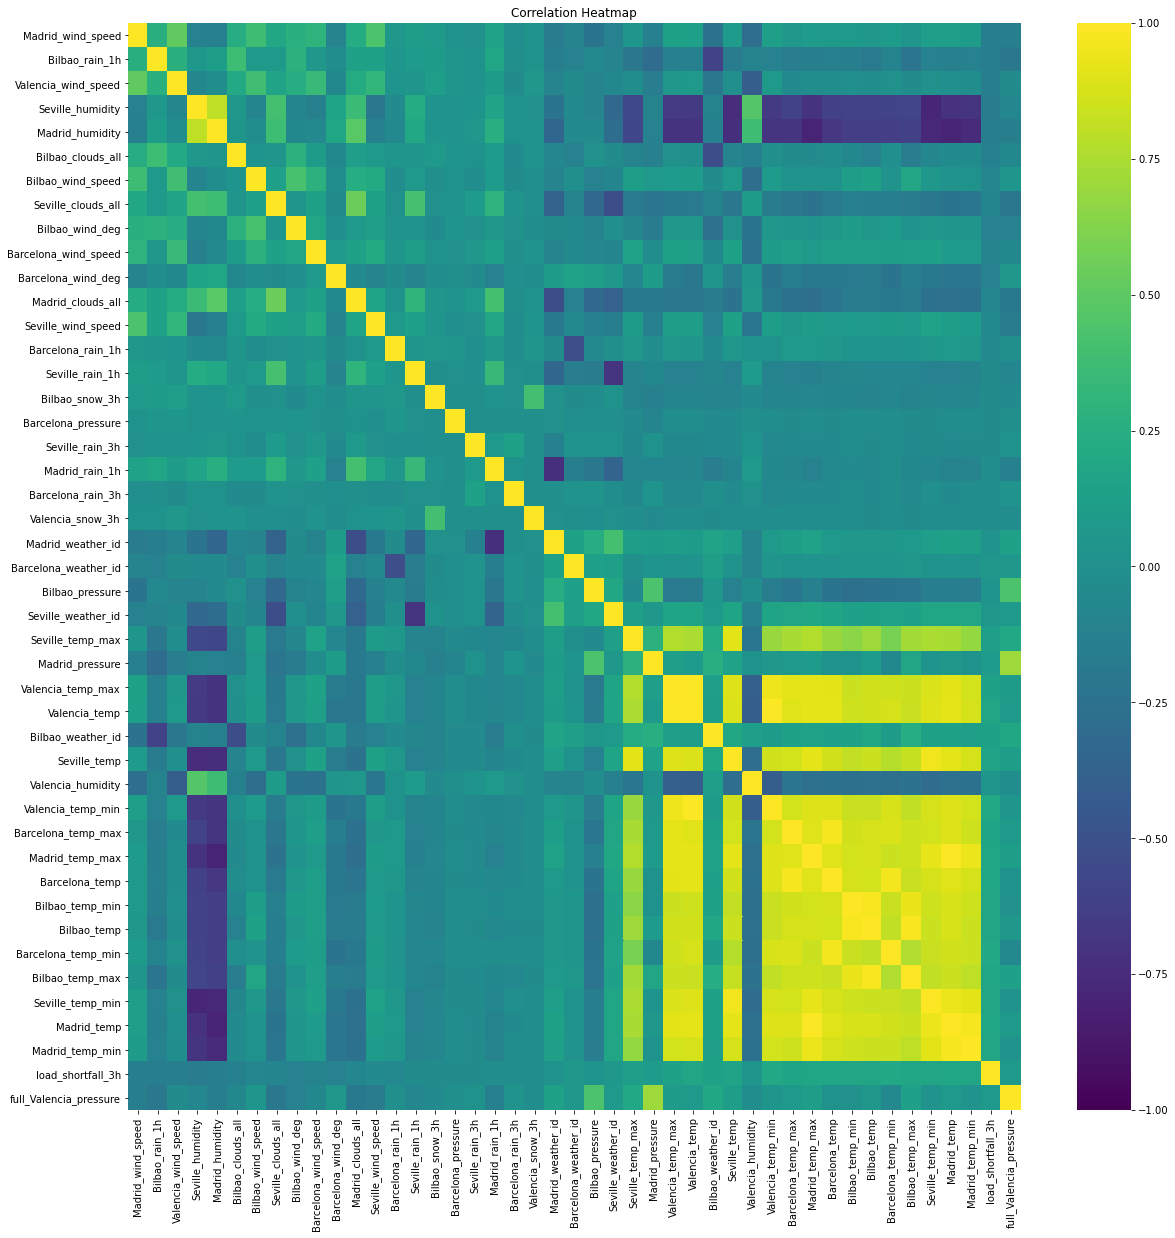

In [145]:
#Visualise the correlation using a heatmap
fig, ax = plt.subplots(figsize = (20,20))
heatmap = sns.heatmap(spain_df.corr(),ax=ax, vmin=-1, vmax=1, annot=False, cmap="viridis")
heatmap.set_title("Correlation Heatmap", fontdict = {"fontsize":12})

The heatmap indicates high muticollinearity between some columns which are denoted with 'min' and 'max'. For exapmle madrid temp and madrid temp_min  are highly correlated. When variables are highly correlated, one can be predicted from the other. 

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [146]:
# remove missing values/ features

Dummy variable encoding 

In [147]:
spain_df_dummies = pd.get_dummies(spain_df[['Valencia_wind_deg','Valencia_wind_deg','Seville_pressure']])
spain_df_dummies.head()

,Valencia_wind_deg_level_1,Valencia_wind_deg_level_10,Valencia_wind_deg_level_2,Valencia_wind_deg_level_3,Valencia_wind_deg_level_4,Valencia_wind_deg_level_5,Valencia_wind_deg_level_6,Valencia_wind_deg_level_7,Valencia_wind_deg_level_8,Valencia_wind_deg_level_9,...,Seville_pressure_sp23,Seville_pressure_sp24,Seville_pressure_sp25,Seville_pressure_sp3,Seville_pressure_sp4,Seville_pressure_sp5,Seville_pressure_sp6,Seville_pressure_sp7,Seville_pressure_sp8,Seville_pressure_sp9
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


From the pd.dummies dataframe we can see that we have generated 45 more columns which when added to the other columns will give us more than 90 columns! 

In [148]:
# create new features

In [149]:
spain_df ['Valencia_wind_deg']

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
8758     level_6
8759     level_6
8760     level_9
8761     level_8
8762     level_9
Name: Valencia_wind_deg, Length: 8763, dtype: object

In [150]:
spain_df['Valencia_wind_deg_slice'] = spain_df ['Valencia_wind_deg'].str.slice(6)

In [151]:
spain_df['Valencia_wind_deg_slice']

0        5
1       10
2        9
3        8
4        7
        ..
8758     6
8759     6
8760     9
8761     8
8762     9
Name: Valencia_wind_deg_slice, Length: 8763, dtype: object

In [152]:
spain_df['Valencia_wind_deg_slice']= spain_df['Valencia_wind_deg_slice'].astype(float)

In [153]:
del spain_df['Valencia_wind_deg']

In [154]:
spain_df['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
8758    sp23
8759    sp23
8760    sp22
8761    sp23
8762    sp25
Name: Seville_pressure, Length: 8763, dtype: object

In [155]:
spain_df['Seville_pressure_slice'] = spain_df['Seville_pressure'].str.slice(2)

In [156]:
spain_df['Seville_pressure_slice']

0       25
1       25
2       25
3       25
4       25
        ..
8758    23
8759    23
8760    22
8761    23
8762    25
Name: Seville_pressure_slice, Length: 8763, dtype: object

In [157]:
spain_df['Seville_pressure_slice'] = spain_df['Seville_pressure_slice'].astype(float)

In [158]:
del spain_df['Seville_pressure']

In [159]:
del spain_df ['time']

In [160]:
#split datetime to year, month, day, hour
spain_df['year'] = pd.DatetimeIndex(spain_df['datetime']).year
spain_df['month'] = pd.DatetimeIndex(spain_df['datetime']).month
spain_df['day'] = pd.DatetimeIndex(spain_df['datetime']).day
spain_df['hour'] = pd.DatetimeIndex(spain_df['datetime']).hour

In [161]:
spain_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_min,load_shortfall_3h,full_Valencia_pressure,datetime,Valencia_wind_deg_slice,Seville_pressure_slice,year,month,day,hour
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,265.938000,6715.666667,1002.666667,2015-01-01 03:00:00,5.0,25.0,2015,1,1,3
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,266.386667,4171.666667,1004.333333,2015-01-01 06:00:00,10.0,25.0,2015,1,1,6
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,272.708667,4274.666667,1005.333333,2015-01-01 09:00:00,9.0,25.0,2015,1,1,9
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,281.895219,5075.666667,1009.000000,2015-01-01 12:00:00,8.0,25.0,2015,1,1,12
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,280.678437,6620.666667,1012.051407,2015-01-01 15:00:00,7.0,25.0,2015,1,1,15


Reorder columns so that dependent variable is the last column in the dataframe 

In [162]:
column_titles = ['datetime'] + ['year'] + ['month'] + ['day'] + ['hour'] + [col for col in spain_df.columns if col!= 'load_shortfall_3h' and col!= 'datetime' and col!='year' and col!= 'month' and col!='day' and col!='hour'] + ['load_shortfall_3h']
spain_df = spain_df.reindex(columns = column_titles)

In [163]:
spain_df.head()

,datetime,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,full_Valencia_pressure,Valencia_wind_deg_slice,Seville_pressure_slice,load_shortfall_3h
0,2015-01-01 03:00:00,2015,1,1,3,0.666667,0.0,0.666667,74.333333,64.000000,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,1002.666667,5.0,25.0,6715.666667
1,2015-01-01 06:00:00,2015,1,1,6,0.333333,0.0,1.666667,78.333333,64.666667,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,1004.333333,10.0,25.0,4171.666667
2,2015-01-01 09:00:00,2015,1,1,9,1.000000,0.0,1.000000,71.333333,64.333333,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,1005.333333,9.0,25.0,4274.666667
3,2015-01-01 12:00:00,2015,1,1,12,1.000000,0.0,1.000000,65.333333,56.333333,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,1009.000000,8.0,25.0,5075.666667
4,2015-01-01 15:00:00,2015,1,1,15,1.000000,0.0,1.000000,59.000000,57.000000,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,1012.051407,7.0,25.0,6620.666667


Correlation between the formated features 

In [164]:
spain_df.corr()

,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,full_Valencia_pressure,Valencia_wind_deg_slice,Seville_pressure_slice,load_shortfall_3h
year,1.000000,-0.001039,-0.001044,0.000275,-0.031553,-0.200747,-0.012650,-0.045730,-0.084456,-0.031658,...,0.002317,0.053927,0.056996,-0.031599,0.029974,0.034880,0.228903,-0.057513,-0.126372,0.131324
month,-0.001039,1.000000,0.008826,0.000301,-0.237445,-0.188274,-0.237156,-0.111622,-0.076567,-0.117452,...,0.239443,0.159629,0.277963,0.205000,0.182860,0.157368,0.053704,-0.140195,-0.036368,0.199048
day,-0.001044,0.008826,1.000000,0.000285,-0.029954,0.072752,-0.000340,0.032979,0.047372,0.025688,...,0.020639,0.002132,0.021208,-0.012197,0.000861,0.023009,-0.052824,-0.010627,-0.008461,0.092116
hour,0.000275,0.000301,0.000285,1.000000,0.186228,0.054527,0.204103,-0.424982,-0.307872,-0.023714,...,0.268754,0.242716,0.256644,0.358350,0.290699,0.270623,-0.017326,-0.138415,-0.059733,0.139285
Madrid_wind_speed,-0.031553,-0.237445,-0.029954,0.186228,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,...,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.142737,0.121835,-0.182792,-0.150981
Bilbao_rain_1h,-0.200747,-0.188274,0.072752,0.054527,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,...,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.199341,0.199288,0.067471,-0.152510
Valencia_wind_speed,-0.012650,-0.237156,-0.000340,0.204103,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,...,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.038234,0.292731,-0.065082,-0.142791
Seville_humidity,-0.045730,-0.111622,0.032979,-0.424982,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,...,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.078962,0.240007,0.217941,-0.167290
Madrid_humidity,-0.084456,-0.076567,0.047372,-0.307872,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,...,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.146866,0.253549,0.294543,-0.150536
Bilbao_clouds_all,-0.031658,-0.117452,0.025688,-0.023714,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,...,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.067832,0.158266,-0.038859,-0.127293


Generating the regression string with statsmodel's ols

In [165]:
del spain_df['datetime']

In [166]:
from statsmodels.formula.api import ols

#model dataframe with all columns 
dfm = spain_df.copy()

#the dependent variable 
y_shortfall = 'load_shortfall_3h'

#the independent variables
x_names = [col for col in dfm.columns if col!= 'load_shortfall_3h']

#build OLS formula string
formula_str = y_shortfall + " ~ " + " + ".join(x_names)
print ("Formula:\n\t {}".format(formula_str))

Formula:
	 load_shortfall_3h ~ year + month + day + hour + Madrid_wind_speed + Bilbao_rain_1h + Valencia_wind_speed + Seville_humidity + Madrid_humidity + Bilbao_clouds_all + Bilbao_wind_speed + Seville_clouds_all + Bilbao_wind_deg + Barcelona_wind_speed + Barcelona_wind_deg + Madrid_clouds_all + Seville_wind_speed + Barcelona_rain_1h + Seville_rain_1h + Bilbao_snow_3h + Barcelona_pressure + Seville_rain_3h + Madrid_rain_1h + Barcelona_rain_3h + Valencia_snow_3h + Madrid_weather_id + Barcelona_weather_id + Bilbao_pressure + Seville_weather_id + Seville_temp_max + Madrid_pressure + Valencia_temp_max + Valencia_temp + Bilbao_weather_id + Seville_temp + Valencia_humidity + Valencia_temp_min + Barcelona_temp_max + Madrid_temp_max + Barcelona_temp + Bilbao_temp_min + Bilbao_temp + Barcelona_temp_min + Bilbao_temp_max + Seville_temp_min + Madrid_temp + Madrid_temp_min + full_Valencia_pressure + Valencia_wind_deg_slice + Seville_pressure_slice


In [167]:
#fit the model using the model dataframe
model = ols(formula = formula_str, data = dfm)
fitted = model.fit()

#output the printed summary
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     38.05
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:53:31   Log-Likelihood:                -86578.
No. Observations:                8763   AIC:                         1.733e+05
Df Residuals:                    8712   BIC:                         1.736e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5

**VARIABLE SIGNIFICANCE AND CORRELATION**

The OLS summary still indicates strong multicollinearity. We need to filter the features some more. Let us evaluate their significance and correlation.
Lets evaluate features that have the strongest correlations (both positive and negative)

In [168]:
#calculate the correlation between predictor variables and the response variable
corrs = spain_df.corr()['load_shortfall_3h'].sort_values(ascending=False)

Using Pearson regression from SciPy:

In [126]:
del spain_df['month']

In [170]:
from scipy.stats import pearsonr

#Build a dictionary of correlation coefficients and p-values
my_dict = {}

column_titles = [col for col in corrs.index if col!='load_shortfall_3h']
for col in column_titles:
    p_val = round(pearsonr(spain_df[col], spain_df['load_shortfall_3h'])[1],6)
    my_dict[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}

#create a new dataframe to store the correlation coefficients and p-values for reference    
df_cp = pd.DataFrame(my_dict).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Valencia_temp_min,0.201863,0.000000
full_Valencia_pressure,0.076012,0.000000
Barcelona_weather_id,0.063868,0.000000
Seville_weather_id,0.061104,0.000000
Seville_humidity,-0.167290,0.000000
Barcelona_rain_1h,-0.056633,0.000000
Bilbao_wind_speed,-0.081602,0.000000
Madrid_clouds_all,-0.081623,0.000000
day,0.092116,0.000000
Seville_clouds_all,-0.091804,0.000000


The smaller the p-value the stronger the evidence that we should reject the null hypothesis. Hence a p-value less than 5% (typically <= 0.05) is stastistically significant. we will only consider features which  have a p-value of <0.05
All the features are statistically significant. i.e their p-values are <0.05

Keep all the features in a dataframe x

In [171]:
#the dependent variable is still the same
y_shortfall= spain_df['load_shortfall_3h']

#model building - independent variable (IV) DataFrame 
X_names = list (df_cp[df_cp['P_Value'] < 0.05].index)
X_data = spain_df[X_names]

Look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

In [172]:
#create correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Valencia_temp_min,month,Barcelona_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Bilbao_temp_max,Bilbao_temp,Madrid_temp_min,Seville_temp_min,...,Barcelona_wind_speed,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Valencia_wind_speed,Madrid_humidity,Madrid_wind_speed,Bilbao_rain_1h,Seville_humidity,Valencia_wind_deg_slice
Valencia_temp_min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona_temp_min,NaN,NaN,1.000000,NaN,0.964089,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_temp,NaN,NaN,NaN,1.000000,0.903143,0.988871,NaN,NaN,0.973641,0.939079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barcelona_temp,NaN,NaN,0.964089,0.903143,1.000000,0.900428,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_temp_max,NaN,NaN,NaN,0.988871,0.900428,1.000000,NaN,NaN,0.939147,0.923481,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_temp_max,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.981624,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bilbao_temp,NaN,NaN,NaN,NaN,NaN,NaN,0.981624,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Madrid_temp_min,NaN,NaN,NaN,0.973641,NaN,0.939147,NaN,NaN,1.000000,0.907758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seville_temp_min,NaN,NaN,NaN,0.939079,NaN,0.923481,NaN,NaN,0.907758,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Isolate the sections of the correlation matrix where the off-diagonal correlations are high.

In [173]:
#create correlation matrix again 
#find rows and columns where correlation coefficients >0.9 or <-0.9
corr = X_data.corr()
r,c = np.where(np.abs(corr) > 0.9) 

#the off diagonal entries
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Valencia_temp,Valencia_temp_max,Barcelona_temp,Barcelona_temp,Madrid_temp_max,Madrid_temp_min,Seville_temp_min,Valencia_temp,Seville_temp,Valencia_temp_max,...,Madrid_temp_max,Seville_temp_min,Seville_temp_max,Valencia_temp_min,Madrid_temp,Barcelona_temp,Madrid_temp_max,Valencia_temp,Barcelona_temp_max,Seville_temp
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,...,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Valencia_temp_min,0.985479,0.949377,0.892024,0.892024,0.893368,0.860347,0.871738,0.985479,0.852492,0.949377,...,0.893368,0.871738,0.694121,1.000000,0.897012,0.892024,0.893368,0.985479,0.860510,0.852492
Barcelona_temp_min,0.874447,0.845057,0.964089,0.964089,0.836680,0.838985,0.831689,0.874447,0.779252,0.845057,...,0.836680,0.831689,0.586923,0.879687,0.853881,0.964089,0.836680,0.874447,0.885911,0.779252
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075
Madrid_temp,0.915753,0.911331,0.903143,0.903143,0.988871,0.973641,0.939079,0.915753,0.917075,0.911331,...,0.988871,0.939079,0.740831,0.897012,1.000000,0.903143,0.988871,0.915753,0.896766,0.917075


Drop columns that are highly correlated

In [174]:
def find_correlation(data, threshold=0.9, remove_negative=False):
    corr_mat = data.corr()
    if remove_negative:
        corr_mat = np.abs(corr_mat)
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][corr_mat[col] > threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

Columns that are highly correlated:

In [175]:
find_correlation(corr)

['Madrid_temp',
 'Barcelona_temp',
 'Madrid_temp_max',
 'Bilbao_temp_max',
 'Bilbao_temp',
 'Madrid_temp_min',
 'Seville_temp_min',
 'Valencia_temp',
 'Bilbao_temp_min',
 'Barcelona_temp_max',
 'Seville_temp',
 'Valencia_temp_max',
 'Seville_temp_max',
 'Valencia_temp_min',
 'Madrid_pressure',
 'Madrid_clouds_all',
 'Madrid_humidity']

In [176]:
#Remove columns that are highly correlated
X_remove = find_correlation(corr)

# Take a new subset of our potential independent variables (features)
X_corr_names = [col for col in X_names if col not in X_remove]


In [177]:
# Create our new OLS formula based upon our smaller subset of remaining columns
y_shortfall = 'load_shortfall_3h'

formula_str = y_shortfall + " ~ " + " + ".join(X_corr_names)
print ("Formula:\n\t {}".format(formula_str))

Formula:
	 load_shortfall_3h ~ month + Barcelona_temp_min + Bilbao_weather_id + hour + year + day + full_Valencia_pressure + Barcelona_weather_id + Seville_weather_id + Valencia_humidity + Bilbao_pressure + Madrid_weather_id + Valencia_snow_3h + Barcelona_rain_3h + Madrid_rain_1h + Seville_pressure_slice + Seville_rain_1h + Bilbao_snow_3h + Seville_rain_3h + Barcelona_pressure + Seville_wind_speed + Barcelona_rain_1h + Bilbao_wind_speed + Seville_clouds_all + Barcelona_wind_speed + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Valencia_wind_speed + Madrid_wind_speed + Bilbao_rain_1h + Seville_humidity + Valencia_wind_deg_slice


In [178]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     48.74
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          4.40e-290
Time:                        22:55:50   Log-Likelihood:                -86703.
No. Observations:                8763   AIC:                         1.735e+05
Df Residuals:                    8729   BIC:                         1.737e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

**Variance Threshhold**

In [179]:
#Seperate independent variables from the dependent variable 
x_names = X_corr_names
x_data = spain_df[x_names]
y_data = spain_df[y_shortfall]

In [180]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)
x_normalize = pd.DataFrame(x_scaled, columns=x_data.columns)

In [181]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(x_normalize)

VarianceThreshold(threshold=0.03)

Calculate variance for each feature

In [182]:
#Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(x_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
4,year,0.166467
3,hour,0.107136
27,Bilbao_clouds_all,0.105945
32,Valencia_wind_deg_slice,0.102221
0,month,0.098241
15,Seville_pressure_slice,0.090924
5,day,0.086009
26,Bilbao_wind_deg,0.080656
23,Seville_clouds_all,0.062181
25,Barcelona_wind_deg,0.061218


In [183]:
#select new columns that made the threshhold cut 0.03
x_new_0 = x_normalize[x_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
x_var_names_0 = x_new_0.columns

# View first few entries
x_new_0.head()

,month,Bilbao_weather_id,hour,year,day,Valencia_humidity,Seville_pressure_slice,Seville_clouds_all,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Seville_humidity,Valencia_wind_deg_slice
0,0.0,0.993296,0.142857,0.0,0.0,0.728625,1.0,0.0,0.118519,0.621521,0.00,0.720000,0.444444
1,0.0,0.993296,0.285714,0.0,0.0,0.676580,1.0,0.0,0.386111,0.615028,0.00,0.763636,1.000000
2,0.0,0.993296,0.428571,0.0,0.0,0.617100,1.0,0.0,0.905556,0.596475,0.00,0.687273,0.888889
3,0.0,0.993296,0.571429,0.0,0.0,0.486989,1.0,0.0,0.758333,0.555659,0.00,0.621818,0.777778
4,0.0,0.993296,0.714286,0.0,0.0,0.535316,1.0,0.0,0.722222,0.514842,0.02,0.552727,0.666667


In [184]:
x_new_0.shape

(8763, 13)

We are down to 10 columns 

In [185]:
#Evaluate more thresholds:
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)

In [186]:
#apply threshold on data 
selector_1.fit(x_normalize)

VarianceThreshold(threshold=0.05)

In [187]:
selector_2.fit(x_normalize)

VarianceThreshold(threshold=0.1)

In [188]:
# Select subset of columns
x_0 = x_normalize[x_normalize.columns[selector.get_support(indices=True)]]
x_1 = x_normalize[x_normalize.columns[selector_1.get_support(indices=True)]]
x_2 = x_normalize[x_normalize.columns[selector_2.get_support(indices=True)]]

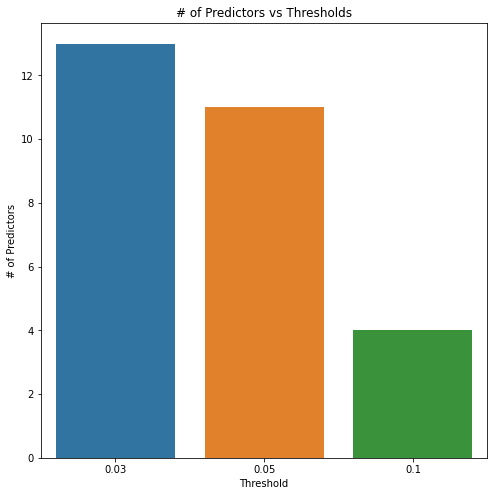

In [189]:
#graph the number of predictors by the thresholds to investigate the relationship
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 8), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [x_0.shape[1], x_1.shape[1], x_2.shape[1]]
thresholds = ['0.03', '0.05', '0.1']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

As we increase the threshold, the number of predictors decrease

OLS fit summary for a threshold of 0.03

In [190]:
# New OLS formula?
formula_str = y_shortfall+' ~ '+' + '.join(x_new_0.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ month + Bilbao_weather_id + hour + year + day + Valencia_humidity + Seville_pressure_slice + Seville_clouds_all + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Seville_humidity + Valencia_wind_deg_slice


In [192]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=spain_df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     99.76
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          1.18e-250
Time:                        22:58:35   Log-Likelihood:                -86838.
No. Observations:                8763   AIC:                         1.737e+05
Df Residuals:                    8749   BIC:                         1.738e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

OLS fit summary for a threshold of 0.5

In [193]:
#select new columns that made the threshhold cut 0.5
x_new_1 = x_normalize[x_normalize.columns[selector_1.get_support(indices=True)]]

# Save variable names for later
x_var_names_1 = x_new_1.columns

# View first few entries
x_new_1.head()

,month,hour,year,day,Seville_pressure_slice,Seville_clouds_all,Barcelona_wind_deg,Bilbao_wind_deg,Bilbao_clouds_all,Seville_humidity,Valencia_wind_deg_slice
0,0.0,0.142857,0.0,0.0,1.0,0.0,0.118519,0.621521,0.00,0.720000,0.444444
1,0.0,0.285714,0.0,0.0,1.0,0.0,0.386111,0.615028,0.00,0.763636,1.000000
2,0.0,0.428571,0.0,0.0,1.0,0.0,0.905556,0.596475,0.00,0.687273,0.888889
3,0.0,0.571429,0.0,0.0,1.0,0.0,0.758333,0.555659,0.00,0.621818,0.777778
4,0.0,0.714286,0.0,0.0,1.0,0.0,0.722222,0.514842,0.02,0.552727,0.666667


In [194]:
# New OLS formula?
formula_str = y_shortfall+' ~ '+' + '.join(x_new_1.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ month + hour + year + day + Seville_pressure_slice + Seville_clouds_all + Barcelona_wind_deg + Bilbao_wind_deg + Bilbao_clouds_all + Seville_humidity + Valencia_wind_deg_slice


In [196]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=spain_df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     113.1
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          1.06e-242
Time:                        22:59:12   Log-Likelihood:                -86862.
No. Observations:                8763   AIC:                         1.737e+05
Df Residuals:                    8751   BIC:                         1.738e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

OLS fit summary for a threshold of 0.1

In [197]:
#select new columns that made the threshhold cut 0.1
x_new_2 = x_normalize[x_normalize.columns[selector_2.get_support(indices=True)]]

# Save variable names for later
x_var_names_2 = x_new_2.columns

# View first few entries
x_new_2.head()

,hour,year,Bilbao_clouds_all,Valencia_wind_deg_slice
0,0.142857,0.0,0.00,0.444444
1,0.285714,0.0,0.00,1.000000
2,0.428571,0.0,0.00,0.888889
3,0.571429,0.0,0.00,0.777778
4,0.714286,0.0,0.02,0.666667


In [198]:
# New OLS formula?
formula_str = y_shortfall+' ~ '+' + '.join(x_new_2.columns)
print('Formula:\n\t{}'.format(formula_str))

Formula:
	load_shortfall_3h ~ hour + year + Bilbao_clouds_all + Valencia_wind_deg_slice


In [199]:
# Fit the model using the model dataframe
model = ols(formula=formula_str, data=spain_df)
fitted = model.fit()

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     171.4
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          1.52e-141
Time:                        23:09:50   Log-Likelihood:                -87114.
No. Observations:                8763   AIC:                         1.742e+05
Df Residuals:                    8758   BIC:                         1.743e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

The condition number has not been indicated as large but we are down to two features only. This could be too low.

In [72]:
''''''# engineer existing features

''

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

MULTIPLE LINEAR REGRESSION MODEL

CHECK FOR LINEARITY

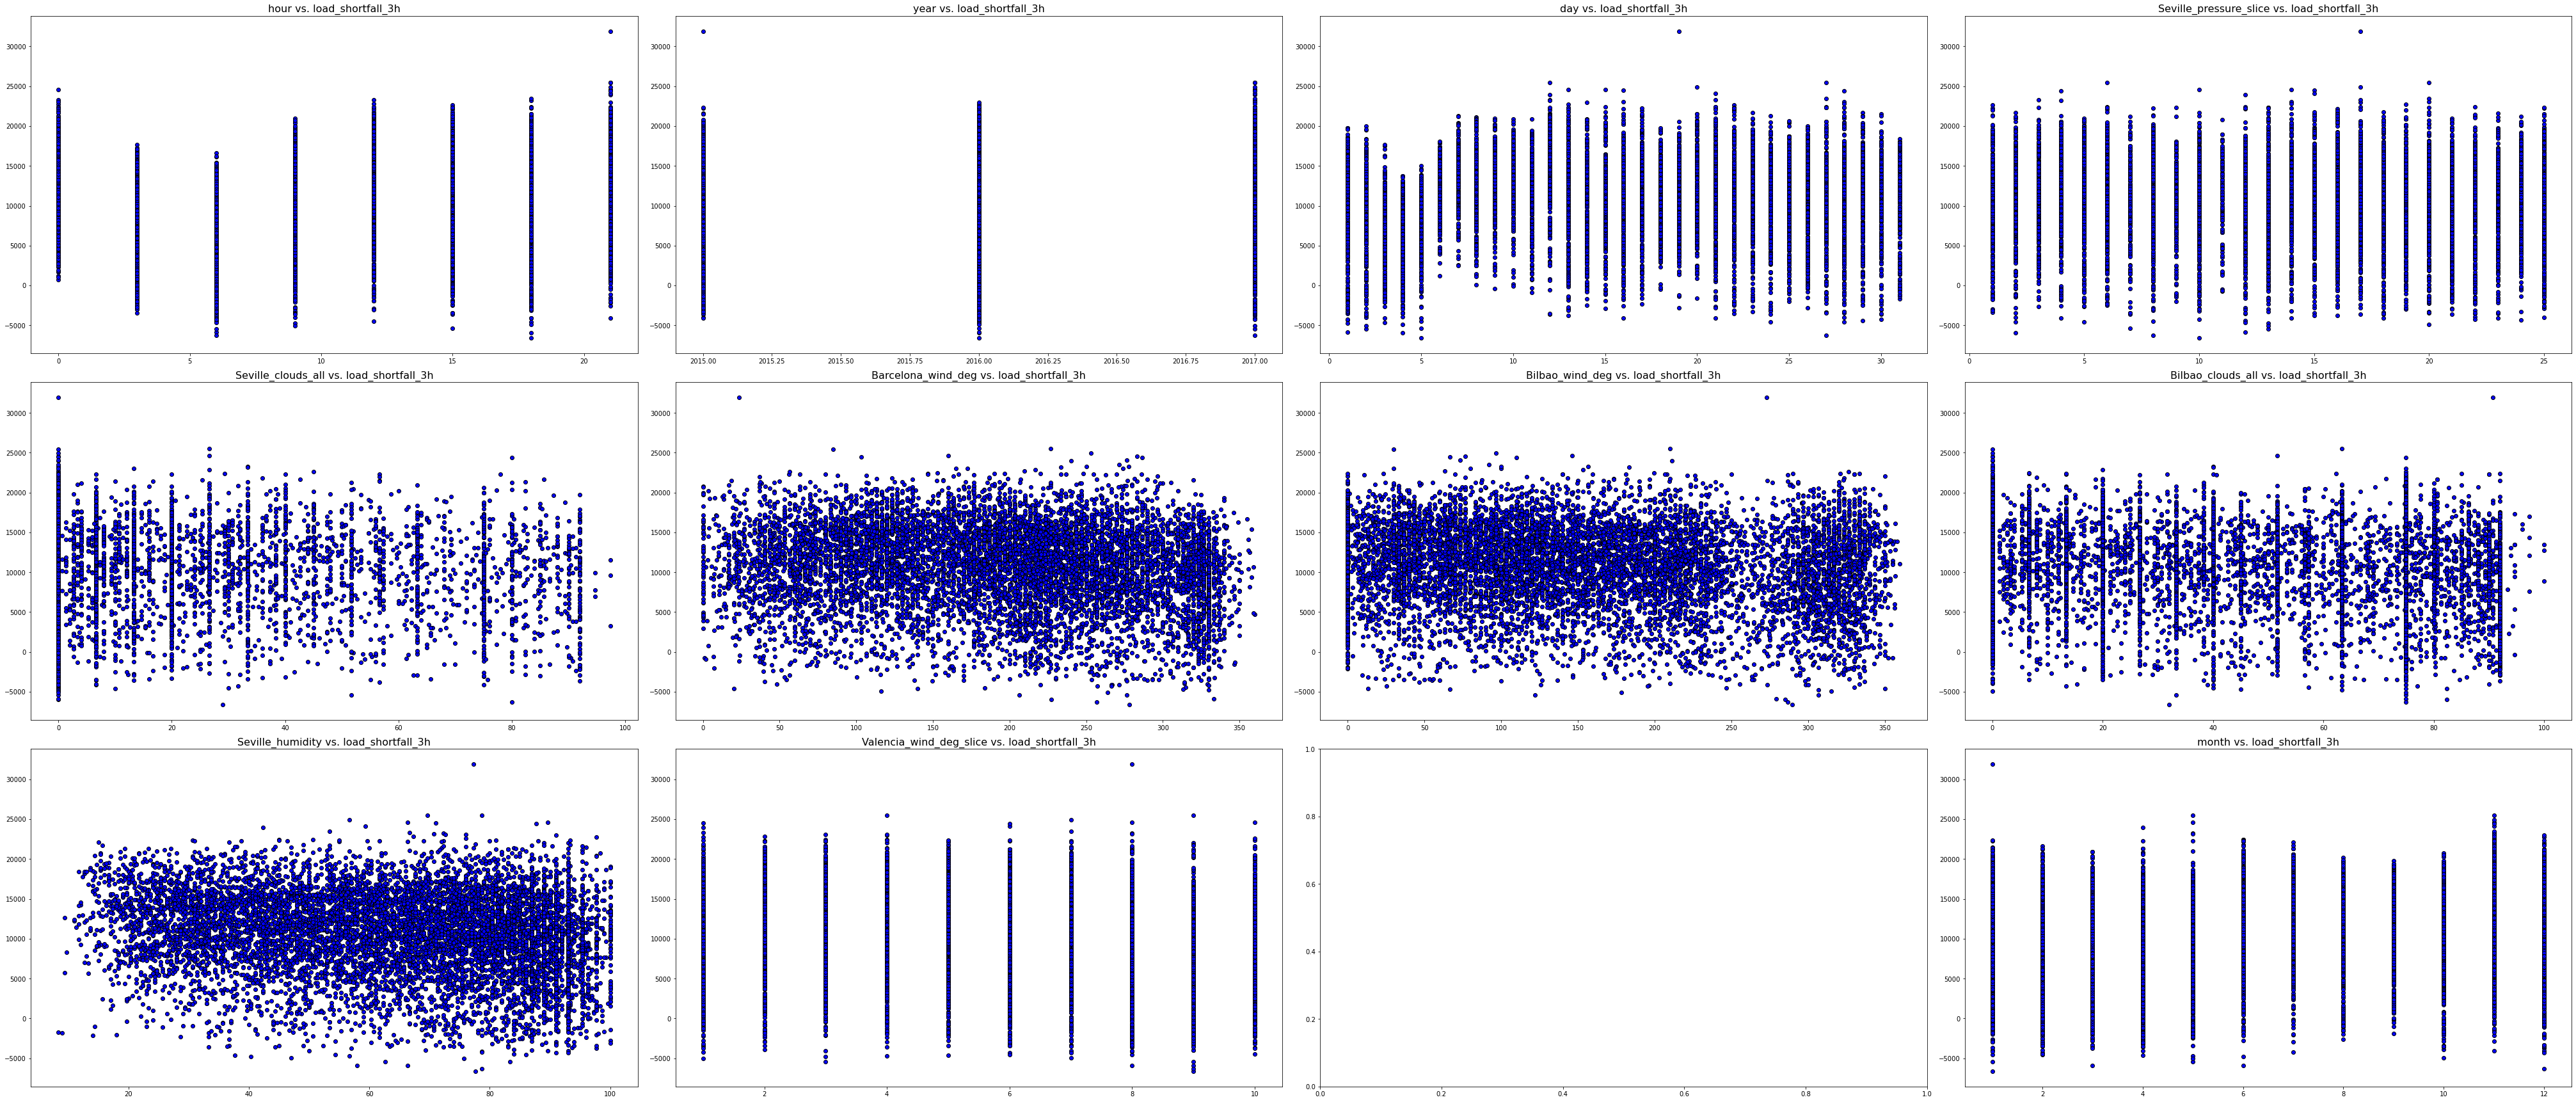

In [308]:
fig, axs = plt.subplots(3,4, figsize=(56,24),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(x_new_1.columns):
    axs[index-1].set_title("{} vs. load_shortfall_3h".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['load_shortfall_3h'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

There is no apparent linear relationship between the features and the response variable.

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [201]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [202]:
# create targets and features dataset

In [203]:
# Training and testing data for variance threshold model (threshold = 0.1)
x_var_train = x_train[x_var_names_1]
x_var_test = x_test[x_var_names_1]

In [204]:
# Training and testing data for correlation threshold model
x_corr_train = x_train[X_corr_names]
x_corr_test = x_test[X_corr_names]

In [205]:
#Fit model
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [206]:
lm.fit(x_train, y_train);
lm_corr.fit(x_corr_train,y_train);
lm_var.fit(x_var_train,y_train);

Asses model accuracy

In [207]:
from sklearn.metrics import mean_squared_error, r2_score

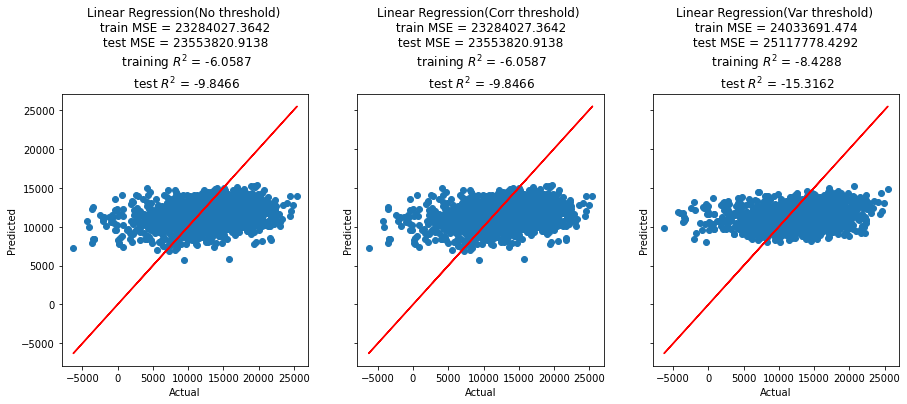

In [208]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(x_train),
              lm_corr.predict(x_corr_train),
              lm_var.predict(x_var_train)]
test_pred = [lm.predict(x_test),
             lm_corr.predict(x_corr_test),
             lm_var.predict(x_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])
    
plt.show()

DRAFT A CRUDE time vs shortfall using the MLR model

In [356]:
test_df = pd.read_csv('df_test.csv')

In [357]:
eng_test_df=test_df.copy()

In [358]:
eng_test_df['Seville_pressure_slice'] = eng_test_df['Seville_pressure'].str.slice(2)

In [359]:
eng_test_df['Seville_pressure_slice'] = eng_test_df['Seville_pressure_slice'].astype(float)

In [360]:
del eng_test_df['Seville_pressure']

In [361]:
eng_test_df['Valencia_wind_deg_slice'] = eng_test_df ['Valencia_wind_deg'].str.slice(6)

In [362]:
eng_test_df['Valencia_wind_deg_slice'] = eng_test_df['Valencia_wind_deg_slice'].astype(float)

In [363]:
del eng_test_df['Valencia_wind_deg']

In [364]:
eng_test_df.isnull().sum()

Unnamed: 0                   0
time                         0
Madrid_wind_speed            0
Bilbao_rain_1h               0
Valencia_wind_speed          0
Seville_humidity             0
Madrid_humidity              0
Bilbao_clouds_all            0
Bilbao_wind_speed            0
Seville_clouds_all           0
Bilbao_wind_deg              0
Barcelona_wind_speed         0
Barcelona_wind_deg           0
Madrid_clouds_all            0
Seville_wind_speed           0
Barcelona_rain_1h            0
Seville_rain_1h              0
Bilbao_snow_3h               0
Barcelona_pressure           0
Seville_rain_3h              0
Madrid_rain_1h               0
Barcelona_rain_3h            0
Valencia_snow_3h             0
Madrid_weather_id            0
Barcelona_weather_id         0
Bilbao_pressure              0
Seville_weather_id           0
Valencia_pressure          454
Seville_temp_max             0
Madrid_pressure              0
Valencia_temp_max            0
Valencia_temp                0
Bilbao_w

In [365]:
round(eng_test_df['Valencia_pressure'].mean(),6)

1013.148351

In [366]:
eng_test_df['full_Valencia_pressure'] = test_df['Valencia_pressure'].fillna(1013.148351)

In [367]:
del test_df['Valencia_pressure']

In [368]:
del eng_test_df['Unnamed: 0']

In [369]:
#split datetime to year, month, day, hour
eng_test_df['datetime'] = pd.to_datetime(eng_test_df['time'], format='%Y-%m-%d %H:%M:%S')
eng_test_df['year'] = pd.DatetimeIndex(eng_test_df['datetime']).year
eng_test_df['month'] = pd.DatetimeIndex(eng_test_df['datetime']).month
eng_test_df['day'] = pd.DatetimeIndex(eng_test_df['datetime']).day
eng_test_df['hour'] = pd.DatetimeIndex(eng_test_df['datetime']).hour

In [370]:
#reorder columns
column_titles = ['datetime'] + ['time'] + ['year'] + ['month'] + ['day'] + ['hour'] + [col for col in eng_test_df.columns if col!= 'load_shortfall_3h' and col!= 'datetime' and col!='year' and col!= 'month' and col!='day' and col!='hour' and col!='time']
eng_test_df = eng_test_df.reindex(columns = column_titles)

In [371]:
eng_test_df.head()

,datetime,time,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Seville_pressure_slice,Valencia_wind_deg_slice,full_Valencia_pressure
0,2018-01-01 00:00:00,2018-01-01 00:00:00,2018,1,1,0,5.000000,0.0,5.000000,87.000000,...,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,25.0,8.0,1013.148351
1,2018-01-01 03:00:00,2018-01-01 03:00:00,2018,1,1,3,4.666667,0.0,5.333333,89.000000,...,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,25.0,8.0,1013.148351
2,2018-01-01 06:00:00,2018-01-01 06:00:00,2018,1,1,6,2.333333,0.0,5.000000,89.000000,...,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,25.0,7.0,1013.148351
3,2018-01-01 09:00:00,2018-01-01 09:00:00,2018,1,1,9,2.666667,0.0,5.333333,93.333333,...,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,25.0,7.0,1013.148351
4,2018-01-01 12:00:00,2018-01-01 12:00:00,2018,1,1,12,4.000000,0.0,8.666667,65.333333,...,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,25.0,7.0,1013.148351


In [372]:
lrm_df = eng_test_df.copy()

In [373]:
x_var_names_1

Index(['month', 'hour', 'year', 'day', 'Seville_pressure_slice',
       'Seville_clouds_all', 'Barcelona_wind_deg', 'Bilbao_wind_deg',
       'Bilbao_clouds_all', 'Seville_humidity', 'Valencia_wind_deg_slice'],
      dtype='object')

In [374]:
X_val = lrm_df[x_var_names_1]

In [375]:
lm_var.predict(X_val)

array([ 8406.74050661,  8732.64924958,  9234.84706682, ...,
       14645.00546636, 14704.81011122, 13444.16034398])

In [376]:
lrm_df['load_shortfall_3h'] = lm_var.predict(X_val)

In [503]:
out_df = lrm_df[['time','load_shortfall_3h']]
out_df.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,8406.740507
1,2018-01-01 03:00:00,8732.649250
2,2018-01-01 06:00:00,9234.847067
3,2018-01-01 09:00:00,9440.699395
4,2018-01-01 12:00:00,9091.674210


In [504]:
#save dataframe to csv
out_df.to_csv('lrm_shortfall.csv', header=True, index=False)

In [379]:
out_df['datetime'] = lrm_df['datetime']
out_df.head()

<ipython-input-379-0251c4e07c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_df['datetime'] = lrm_df['datetime']


,time,load_shortfall_3h,datetime
0,2018-01-01 00:00:00,8406.740507,2018-01-01 00:00:00
1,2018-01-01 03:00:00,8732.649250,2018-01-01 03:00:00
2,2018-01-01 06:00:00,9234.847067,2018-01-01 06:00:00
3,2018-01-01 09:00:00,9440.699395,2018-01-01 09:00:00
4,2018-01-01 12:00:00,9091.674210,2018-01-01 12:00:00


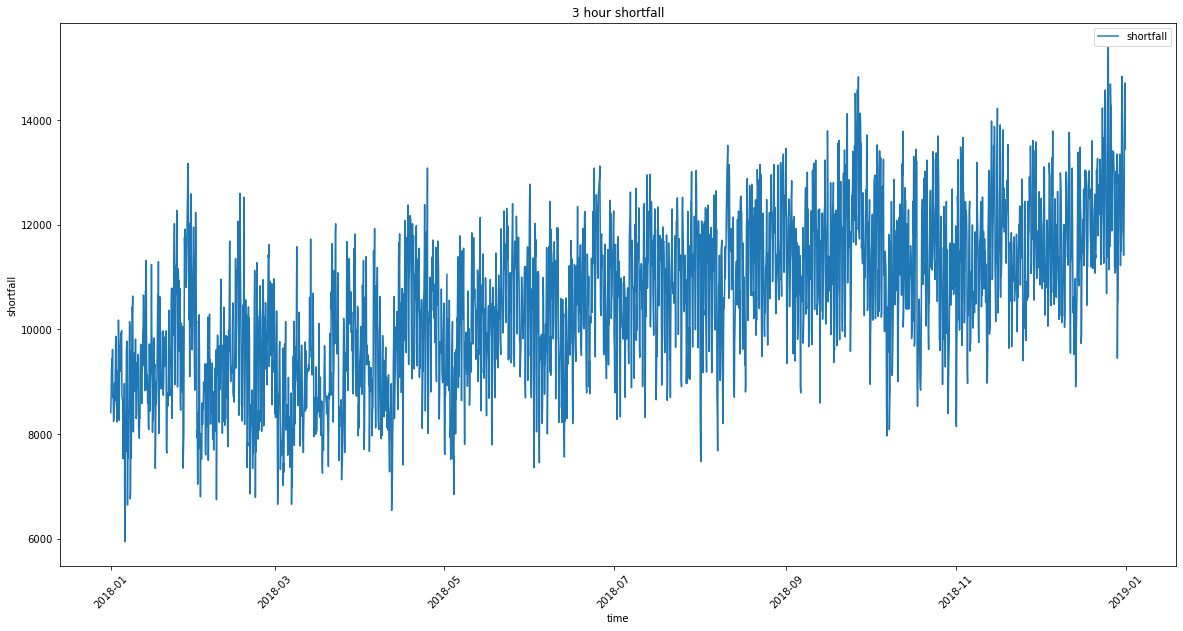

In [380]:
#plot a linegraph
fig,ax = plt.subplots(figsize = (20, 10))
dates = out_df['datetime']
shortfall = out_df['load_shortfall_3h']

ax.plot(dates, shortfall, label = 'shortfall')
ax.set_title('3 hour shortfall')
ax.set_xlabel('time')
ax.set_ylabel('shortfall')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [381]:
# create one or more ML models

**Ridge Regression**

In [385]:
ridge_df = spain_df.copy()
ridge_df.head()

,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,full_Valencia_pressure,Valencia_wind_deg_slice,Seville_pressure_slice,load_shortfall_3h
0,2015,1,1,3,0.666667,0.0,0.666667,74.333333,64.000000,0.0,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,1002.666667,5.0,25.0,6715.666667
1,2015,1,1,6,0.333333,0.0,1.666667,78.333333,64.666667,0.0,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,1004.333333,10.0,25.0,4171.666667
2,2015,1,1,9,1.000000,0.0,1.000000,71.333333,64.333333,0.0,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,1005.333333,9.0,25.0,4274.666667
3,2015,1,1,12,1.000000,0.0,1.000000,65.333333,56.333333,0.0,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,1009.000000,8.0,25.0,5075.666667
4,2015,1,1,15,1.000000,0.0,1.000000,59.000000,57.000000,2.0,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,1012.051407,7.0,25.0,6620.666667


In [386]:
#ridge_df.drop(['year','month','day','hour'], axis = 1, inplace = True )

In [387]:
#ridge_df.head()

In [388]:
#split data into predictors and response
x = ridge_df.drop('load_shortfall_3h', axis = 1)
y = ridge_df['load_shortfall_3h']

In [389]:
# Import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()
# Create scaled version of the predictors (there is no need to scale the response)
x_scaled = scaler.fit_transform(x)
# Convert the scaled predictor values into a dataframe
x_standardise = pd.DataFrame(x_scaled,columns=x.columns)
x_standardise.head()

,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,full_Valencia_pressure,Valencia_wind_deg_slice,Seville_pressure_slice
0,-1.226179,-1.602429,-1.675368,-1.090901,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,...,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892,-1.129531e+00,-0.096053,1.588087
1,-1.226179,-1.602429,-1.675368,-0.654451,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,...,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154,-9.289340e-01,1.641580,1.588087
2,-1.226179,-1.602429,-1.675368,-0.218001,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,...,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407,-8.085757e-01,1.294054,1.588087
3,-1.226179,-1.602429,-1.675368,0.218449,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,...,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488,-3.672620e-01,0.946527,1.588087
4,-1.226179,-1.602429,-1.675368,0.654899,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,...,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665,4.392861e-08,0.599000,1.588087


In [390]:
# Import train/test splitting function from sklearn
from sklearn.model_selection import train_test_split

In [391]:
# Split the data into train and test, being sure to use the standardised predictors
x_train, x_test, y_train, y_test = train_test_split(x_standardise, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False)

In [392]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [393]:
# Create ridge model
ridge = Ridge()

In [394]:
#train the model
ridge.fit(x_train, y_train)

Ridge()

In [395]:
# Extract the model intercept value
b0 = float(ridge.intercept_)
b0

10403.809242319214

In [396]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, x.columns, columns=['Coefficient'])
coeff

,Coefficient
year,-139.467815
month,266.551023
day,344.483388
hour,633.837681
Madrid_wind_speed,-408.542930
Bilbao_rain_1h,-209.640911
Valencia_wind_speed,-115.122874
Seville_humidity,-784.540681
Madrid_humidity,-143.281817
Bilbao_clouds_all,-138.816617


features with smaller coefficients can be interpreted as less important as they have suffered more in the shrinkage tradeoff.

**Asses the predictive accuracy of the model**

compare the accuracy between a linear model(without regularisation) and a linear model with regularisation

In [397]:
# Fit a basic linear model
from sklearn.linear_model import LinearRegression

# Create model object
lm = LinearRegression()

# Train model
lm.fit(x_train, y_train)

LinearRegression()

In [398]:
# Import metrics module
from sklearn import metrics

In [399]:
# Check training accuracy
train_lm = lm.predict(x_train)
train_ridge = ridge.predict(x_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))
print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

Training MSE
Linear: 22583232.808843542
Ridge : 22585747.17909855


In [400]:
test_lm = lm.predict(x_test)
test_ridge = ridge.predict(x_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))
print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))

Testing MSE
Linear: 23525164.921639986
Ridge : 23448791.911658328


Ridge regression achieves a slightly lower MSE when using the tesing data to predict the shortfall at the expense of a slightly higher score on the training set. The slightly higher MSE using the trainig set should not be a concern since we want to avoid overfitting on the training set. 

In [401]:
#plot results take code from ridge regression

In [414]:
eng_test_df.head()

,datetime,time,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Seville_pressure_slice,Valencia_wind_deg_slice,full_Valencia_pressure
0,2018-01-01 00:00:00,2018-01-01 00:00:00,2018,1,1,0,5.000000,0.0,5.000000,87.000000,...,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,25.0,8.0,1013.148351
1,2018-01-01 03:00:00,2018-01-01 03:00:00,2018,1,1,3,4.666667,0.0,5.333333,89.000000,...,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,25.0,8.0,1013.148351
2,2018-01-01 06:00:00,2018-01-01 06:00:00,2018,1,1,6,2.333333,0.0,5.000000,89.000000,...,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,25.0,7.0,1013.148351
3,2018-01-01 09:00:00,2018-01-01 09:00:00,2018,1,1,9,2.666667,0.0,5.333333,93.333333,...,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,25.0,7.0,1013.148351
4,2018-01-01 12:00:00,2018-01-01 12:00:00,2018,1,1,12,4.000000,0.0,8.666667,65.333333,...,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,25.0,7.0,1013.148351


In [415]:
ridge_test_df = eng_test_df.copy()

In [416]:
time_df = eng_test_df['time'].copy()
time_df.head()

0    2018-01-01 00:00:00
1    2018-01-01 03:00:00
2    2018-01-01 06:00:00
3    2018-01-01 09:00:00
4    2018-01-01 12:00:00
Name: time, dtype: object

In [417]:
del ridge_test_df['time']

In [418]:
del ridge_test_df['datetime']

In [423]:
del ridge_test_df ['Valencia_pressure']

In [424]:
ridge_test_df.head()

,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Seville_pressure_slice,Valencia_wind_deg_slice,full_Valencia_pressure
0,2018,1,1,0,5.000000,0.0,5.000000,87.000000,71.333333,20.000000,...,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,25.0,8.0,1013.148351
1,2018,1,1,3,4.666667,0.0,5.333333,89.000000,78.000000,0.000000,...,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,25.0,8.0,1013.148351
2,2018,1,1,6,2.333333,0.0,5.000000,89.000000,89.666667,0.000000,...,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,25.0,7.0,1013.148351
3,2018,1,1,9,2.666667,0.0,5.333333,93.333333,82.666667,26.666667,...,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,25.0,7.0,1013.148351
4,2018,1,1,12,4.000000,0.0,8.666667,65.333333,64.000000,26.666667,...,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,25.0,7.0,1013.148351


In [425]:
x = ridge_test_df

In [427]:
ridge_shorftall= ridge.predict(x)

In [431]:
ridge_test_df['load_shortfall_3h'] = ridge_shorftall

In [432]:
ridge_test_df['time']=time_df

In [434]:
ridge_test_df['datetime'] = pd.to_datetime(ridge_test_df['time'], format='%Y-%m-%d %H:%M:%S')

In [436]:
ridge_test_df.head()

,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Seville_pressure_slice,Valencia_wind_deg_slice,full_Valencia_pressure,load_shortfall_3h,time,datetime
0,2018,1,1,0,5.000000,0.0,5.000000,87.000000,71.333333,20.000000,...,285.150000,283.150000,279.866667,279.150000,25.0,8.0,1013.148351,299286.671635,2018-01-01 00:00:00,2018-01-01 00:00:00
1,2018,1,1,3,4.666667,0.0,5.333333,89.000000,78.000000,0.000000,...,284.150000,281.150000,279.193333,278.150000,25.0,8.0,1013.148351,295475.666169,2018-01-01 03:00:00,2018-01-01 03:00:00
2,2018,1,1,6,2.333333,0.0,5.000000,89.000000,89.666667,0.000000,...,282.150000,280.483333,276.340000,276.150000,25.0,7.0,1013.148351,306474.364478,2018-01-01 06:00:00,2018-01-01 06:00:00
3,2018,1,1,9,2.666667,0.0,5.333333,93.333333,82.666667,26.666667,...,284.483333,279.150000,275.953333,274.483333,25.0,7.0,1013.148351,312755.982927,2018-01-01 09:00:00,2018-01-01 09:00:00
4,2018,1,1,12,4.000000,0.0,8.666667,65.333333,64.000000,26.666667,...,286.816667,284.483333,280.686667,280.150000,25.0,7.0,1013.148351,285251.886855,2018-01-01 12:00:00,2018-01-01 12:00:00


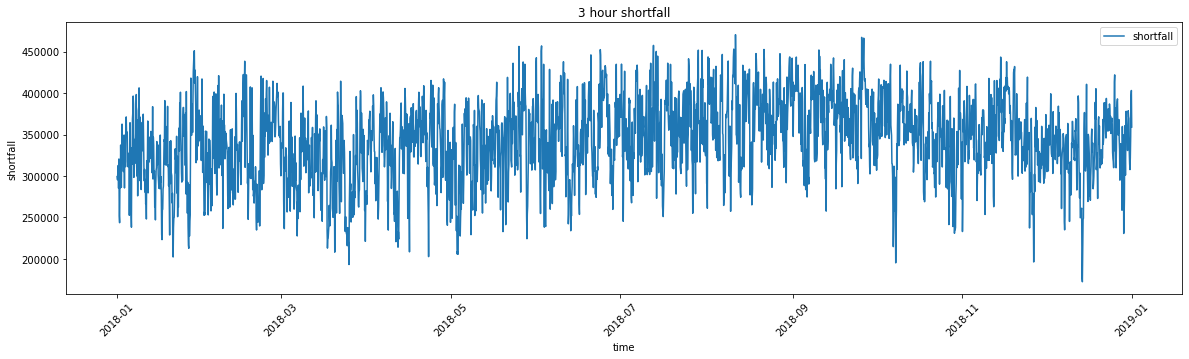

In [438]:
#plot a linegraph
fig,ax = plt.subplots(figsize = (20, 5))
dates =ridge_test_df['datetime']
shortfall = ridge_test_df['load_shortfall_3h']

ax.plot(dates, shortfall, label = 'shortfall')
ax.set_title('3 hour shortfall')
ax.set_xlabel('time')
ax.set_ylabel('shortfall')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [496]:
ridge_sub_df = ridge_test_df[['time', 'load_shortfall_3h']]

In [502]:
#save dataframe to csv
ridge_sub_df.to_csv('ridge_shortfall.csv',header=True, index=False )

**LASSO REGRESSION**

In [439]:
lasso_df = spain_df
lasso_df.head()

,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,full_Valencia_pressure,Valencia_wind_deg_slice,Seville_pressure_slice,load_shortfall_3h
0,2015,1,1,3,0.666667,0.0,0.666667,74.333333,64.000000,0.0,...,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,1002.666667,5.0,25.0,6715.666667
1,2015,1,1,6,0.333333,0.0,1.666667,78.333333,64.666667,0.0,...,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,1004.333333,10.0,25.0,4171.666667
2,2015,1,1,9,1.000000,0.0,1.000000,71.333333,64.333333,0.0,...,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,1005.333333,9.0,25.0,4274.666667
3,2015,1,1,12,1.000000,0.0,1.000000,65.333333,56.333333,0.0,...,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,1009.000000,8.0,25.0,5075.666667
4,2015,1,1,15,1.000000,0.0,1.000000,59.000000,57.000000,2.0,...,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,1012.051407,7.0,25.0,6620.666667


In [440]:
# Separate the features from the response
X = lasso_df.drop('load_shortfall_3h', axis=1)
y = df['load_shortfall_3h']

In [441]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create standardization object
scaler = StandardScaler()

In [442]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [443]:
# Import train/test split module
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [449]:
# Import LASSO module
from sklearn.linear_model import Lasso

# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.001, fit_intercept=False, tol=0.0001,
          max_iter=1000, positive=True)

In [450]:
# Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, fit_intercept=False, positive=True)

In [452]:
# Extract intercept from model
intercept = float(lasso.intercept_)
print(intercept)

0.0


In [454]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
print (coeff)

                         Coefficient
year                        0.000000
month                       0.000000
day                       185.922592
hour                      913.295980
Madrid_wind_speed           0.000000
Bilbao_rain_1h            165.711272
Valencia_wind_speed         0.000000
Seville_humidity         1054.962931
Madrid_humidity           508.637654
Bilbao_clouds_all           0.000000
Bilbao_wind_speed           0.000000
Seville_clouds_all        371.191412
Bilbao_wind_deg             0.000000
Barcelona_wind_speed      487.118001
Barcelona_wind_deg          0.000000
Madrid_clouds_all         566.434717
Seville_wind_speed        507.571519
Barcelona_rain_1h         100.944417
Seville_rain_1h           341.683913
Bilbao_snow_3h            267.593486
Barcelona_pressure          0.000000
Seville_rain_3h           117.264434
Madrid_rain_1h            255.673833
Barcelona_rain_3h         357.834564
Valencia_snow_3h            0.000000
Madrid_weather_id         327.488295
B

In [463]:
train_lasso = lasso.predict(X_train)

In [464]:
from sklearn import metrics

In [465]:
MSE = metrics.mean_squared_error(y_train, train_lasso)

In [469]:
print ('Lasso Model Mean Squared Error: ', MSE)
print ('Lasso Model Root Mean Squared Error: ', np.sqrt(MSE))

Lasso Model Mean Squared Error:  119508284.13796797
Lasso Model Root Mean Squared Error:  10931.984455622318


**Using model on Test data**

In [479]:
eng_test_df.head()

,datetime,time,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,...,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Seville_pressure_slice,Valencia_wind_deg_slice,full_Valencia_pressure
0,2018-01-01 00:00:00,2018-01-01 00:00:00,2018,1,1,0,5.000000,0.0,5.000000,87.000000,...,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,25.0,8.0,1013.148351
1,2018-01-01 03:00:00,2018-01-01 03:00:00,2018,1,1,3,4.666667,0.0,5.333333,89.000000,...,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,25.0,8.0,1013.148351
2,2018-01-01 06:00:00,2018-01-01 06:00:00,2018,1,1,6,2.333333,0.0,5.000000,89.000000,...,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,25.0,7.0,1013.148351
3,2018-01-01 09:00:00,2018-01-01 09:00:00,2018,1,1,9,2.666667,0.0,5.333333,93.333333,...,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,25.0,7.0,1013.148351
4,2018-01-01 12:00:00,2018-01-01 12:00:00,2018,1,1,12,4.000000,0.0,8.666667,65.333333,...,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,25.0,7.0,1013.148351


In [480]:
lasso_df = eng_test_df.copy()

In [481]:
lasso_time = lasso_df['time'].copy()

In [482]:
del lasso_df['time']

In [483]:
del lasso_df['datetime']

In [484]:
del lasso_df ['Valencia_pressure']

In [485]:
x = lasso_df

In [487]:
lasso_df['load_shortfall_3h'] = lasso.predict(x)

In [488]:
lasso_df['time'] = lasso_time

In [490]:
lasso_df['datetime'] =pd.to_datetime(lasso_df['time'], format='%Y-%m-%d %H:%M:%S')

In [491]:
lasso_df.head()

,year,month,day,hour,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,...,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Seville_pressure_slice,Valencia_wind_deg_slice,full_Valencia_pressure,load_shortfall_3h,time,datetime
0,2018,1,1,0,5.000000,0.0,5.000000,87.000000,71.333333,20.000000,...,285.150000,283.150000,279.866667,279.150000,25.0,8.0,1013.148351,4.423191e+06,2018-01-01 00:00:00,2018-01-01 00:00:00
1,2018,1,1,3,4.666667,0.0,5.333333,89.000000,78.000000,0.000000,...,284.150000,281.150000,279.193333,278.150000,25.0,8.0,1013.148351,4.417043e+06,2018-01-01 03:00:00,2018-01-01 03:00:00
2,2018,1,1,6,2.333333,0.0,5.000000,89.000000,89.666667,0.000000,...,282.150000,280.483333,276.340000,276.150000,25.0,7.0,1013.148351,4.423404e+06,2018-01-01 06:00:00,2018-01-01 06:00:00
3,2018,1,1,9,2.666667,0.0,5.333333,93.333333,82.666667,26.666667,...,284.483333,279.150000,275.953333,274.483333,25.0,7.0,1013.148351,4.432042e+06,2018-01-01 09:00:00,2018-01-01 09:00:00
4,2018,1,1,12,4.000000,0.0,8.666667,65.333333,64.000000,26.666667,...,286.816667,284.483333,280.686667,280.150000,25.0,7.0,1013.148351,4.410653e+06,2018-01-01 12:00:00,2018-01-01 12:00:00


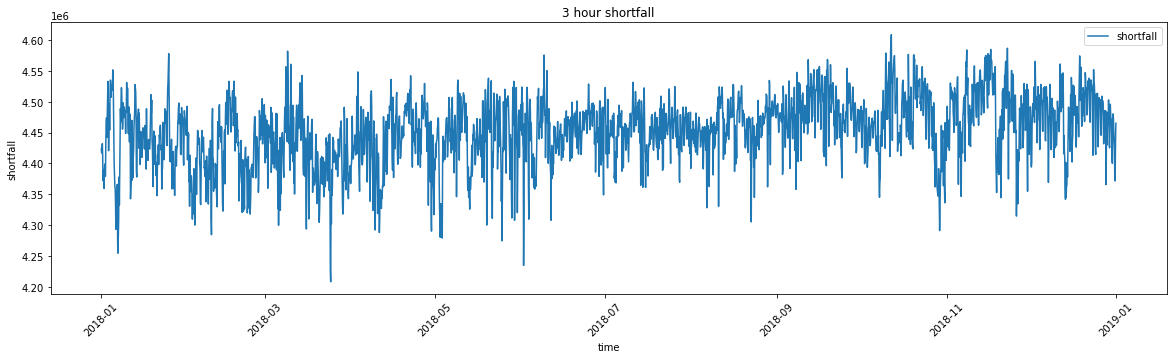

In [492]:
#plot a linegraph
fig,ax = plt.subplots(figsize = (20, 5))
dates =lasso_df['datetime']
shortfall = lasso_df['load_shortfall_3h']

ax.plot(dates, shortfall, label = 'shortfall')
ax.set_title('3 hour shortfall')
ax.set_xlabel('time')
ax.set_ylabel('shortfall')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [498]:
lasso_sub_df = lasso_df[['time','load_shortfall_3h']]

In [501]:
lasso_sub_df.to_csv('lasso_shortfall.csv',header=True, index=False )

# DECISION TREE MODEL

Logistic Regression and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models. (https://builtin.com/data-science/when-and-why-standardize-your-data#:~:text=Logistic%20Regression%20and%20Tree%20based%20algorithms%20such%20as%20Decision%20Tree,fitting%20this%20kind%20of%20models)

In [244]:
dec_tree_df=df
dec_tree_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp,Madrid_temp_min,full_Valencia_pressure,Valencia_wind_deg_slice,Seville_pressure_slice,year,month,day,hour,load_shortfall_3h
0,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,265.938000,265.938000,1002.666667,5.0,25.0,2015,1,1,3,6715.666667
1,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,266.386667,266.386667,1004.333333,10.0,25.0,2015,1,1,6,4171.666667
2,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,272.708667,272.708667,1005.333333,9.0,25.0,2015,1,1,9,4274.666667
3,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,281.895219,281.895219,1009.000000,8.0,25.0,2015,1,1,12,5075.666667
4,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,280.678437,280.678437,1012.051407,7.0,25.0,2015,1,1,15,6620.666667


In [245]:
x = dec_tree_df.drop('load_shortfall_3h', axis = 1)
y = dec_tree_df['load_shortfall_3h']

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [247]:
from sklearn.tree import DecisionTreeRegressor

In [248]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth = 3, random_state=42)

In [249]:
regr_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [250]:
from sklearn.tree import plot_tree

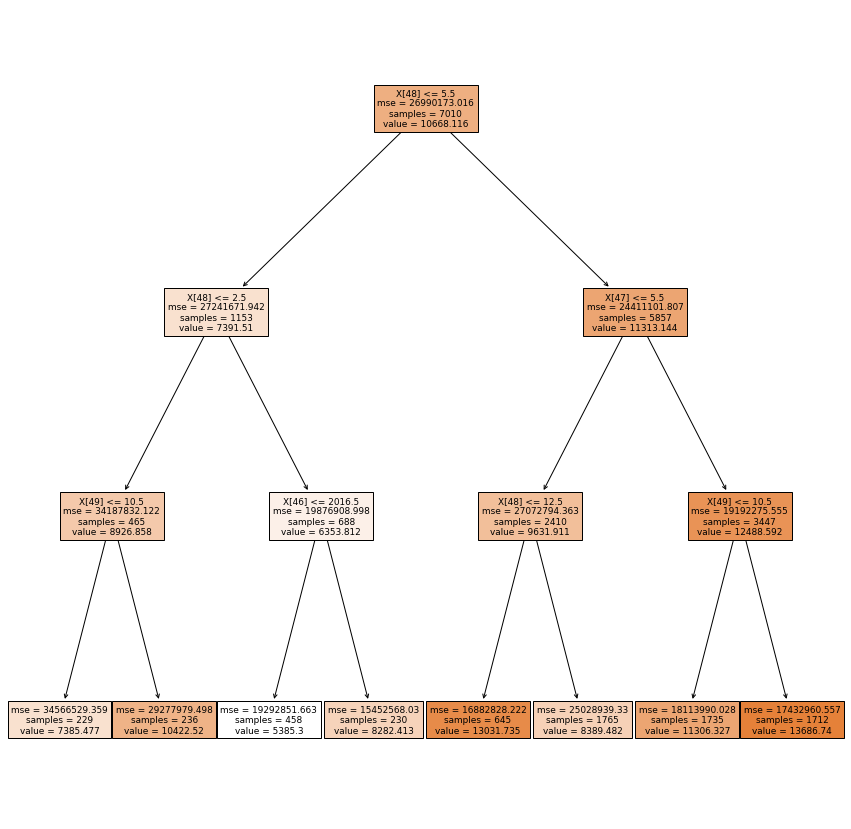

In [251]:
plt.figure(figsize=(15,15))
#assigned a random variable name to the plot to suppress text output
_ = plot_tree(regr_tree,  filled=True)

In [252]:
from sklearn.metrics import mean_squared_error

In [253]:
# get predictions for test data
y_pred = regr_tree.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report MSE and RMSE
print("Regression Decision Tree model MSE is:",MSE)
print("Regression Decision Tree model RMSE is:",np.sqrt(MSE))

Regression Decision Tree model MSE is: 21582058.75909408
Regression Decision Tree model RMSE is: 4645.649444275157


**using model on Test data**

In [270]:
test_df.head()

,Unnamed: 0,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,Seville_pressure_slice,Valencia_wind_deg_slice,datetime,year,month,day,hour
0,8763,2018-01-01 00:00:00,5.000000,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,283.150000,279.866667,279.150000,25.0,8.0,2018-01-01 00:00:00,2018,1,1,0
1,8764,2018-01-01 03:00:00,4.666667,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,281.150000,279.193333,278.150000,25.0,8.0,2018-01-01 03:00:00,2018,1,1,3
2,8765,2018-01-01 06:00:00,2.333333,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,280.483333,276.340000,276.150000,25.0,7.0,2018-01-01 06:00:00,2018,1,1,6
3,8766,2018-01-01 09:00:00,2.666667,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,279.150000,275.953333,274.483333,25.0,7.0,2018-01-01 09:00:00,2018,1,1,9
4,8767,2018-01-01 12:00:00,4.000000,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,284.483333,280.686667,280.150000,25.0,7.0,2018-01-01 12:00:00,2018,1,1,12


In [271]:
del test_df['Unnamed: 0']

In [272]:
time_df = test_df['time'].copy()
time_df.head()

0    2018-01-01 00:00:00
1    2018-01-01 03:00:00
2    2018-01-01 06:00:00
3    2018-01-01 09:00:00
4    2018-01-01 12:00:00
Name: time, dtype: object

In [273]:
del test_df['time']

In [274]:
del test_df['datetime']

In [275]:
round(test_df['Valencia_pressure'].mean(),6)

1013.148351

In [276]:
test_df['full_Valencia_pressure'] = test_df['Valencia_pressure'].fillna(1012.051407)

In [277]:
del test_df['Valencia_pressure']

In [278]:
test_df.head()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Seville_temp_min,Madrid_temp,Madrid_temp_min,Seville_pressure_slice,Valencia_wind_deg_slice,year,month,day,hour,full_Valencia_pressure
0,5.000000,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,...,283.150000,279.866667,279.150000,25.0,8.0,2018,1,1,0,1012.051407
1,4.666667,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,...,281.150000,279.193333,278.150000,25.0,8.0,2018,1,1,3,1012.051407
2,2.333333,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,...,280.483333,276.340000,276.150000,25.0,7.0,2018,1,1,6,1012.051407
3,2.666667,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,...,279.150000,275.953333,274.483333,25.0,7.0,2018,1,1,9,1012.051407
4,4.000000,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,...,284.483333,280.686667,280.150000,25.0,7.0,2018,1,1,12,1012.051407


In [279]:
x = test_df

In [280]:
y_pred =regr_tree.predict(x)

In [281]:
test_df['load_shortfall_3h'] = y_pred

In [282]:
test_df['time']=time_df

In [283]:
s_df = test_df[['time','load_shortfall_3h']]
s_df.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,10422.519774
1,2018-01-01 03:00:00,5385.299854
2,2018-01-01 06:00:00,13031.734884
3,2018-01-01 09:00:00,13031.734884
4,2018-01-01 12:00:00,13031.734884


In [284]:
#save dataframe to csv
s_df.to_csv('rgrtreeshortfall.csv', header=True, index=False)

In [286]:
s_df['datetime'] = pd.to_datetime(s_df['time'], format='%Y-%m-%d %H:%M:%S')
s_df.head()

,time,load_shortfall_3h,datetime
0,2018-01-01 00:00:00,10422.519774,2018-01-01 00:00:00
1,2018-01-01 03:00:00,5385.299854,2018-01-01 03:00:00
2,2018-01-01 06:00:00,13031.734884,2018-01-01 06:00:00
3,2018-01-01 09:00:00,13031.734884,2018-01-01 09:00:00
4,2018-01-01 12:00:00,13031.734884,2018-01-01 12:00:00


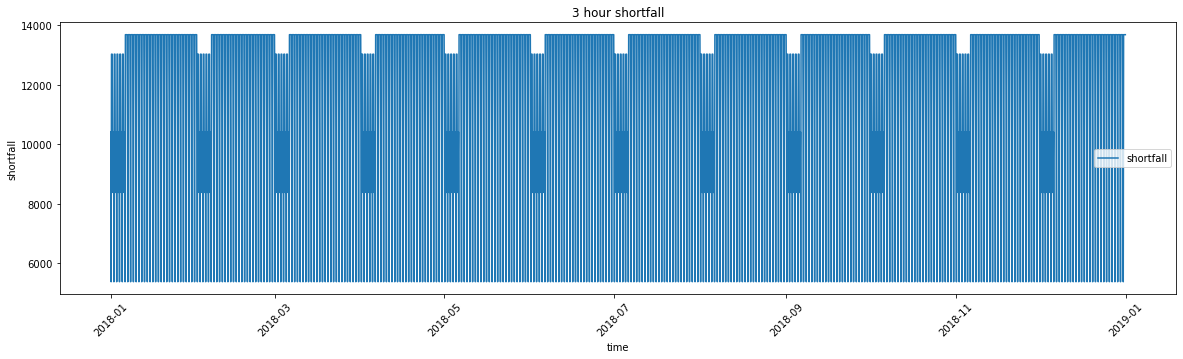

In [293]:
#plot a linegraph
fig,ax = plt.subplots(figsize = (20, 5))
dates = s_df['datetime']
shortfall = s_df['load_shortfall_3h']

ax.plot(dates, shortfall, label = 'shortfall')
ax.set_title('3 hour shortfall')
ax.set_xlabel('time')
ax.set_ylabel('shortfall')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [98]:
# evaluate one or more ML models

**RANDOM FOREST**

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic